Directories exist; saving data


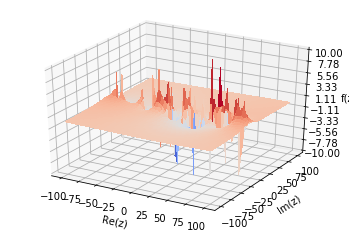

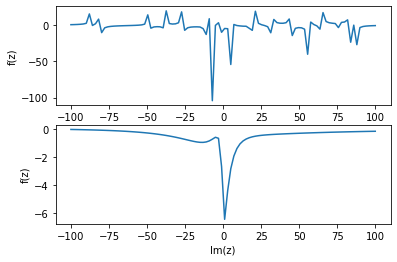

In [126]:
import numpy as np
import importlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from rmm import rmm_utils
from rmm import rmm_plot


# Generate toy model data

importlib.reload(rmm_utils)
importlib.reload(rmm_plot)

# Parameters
path = 'training_data/test'
number_of_poles = 20
true_poles = rmm_utils.random_poles(number_of_poles, [[-100, 100], [0,0]])
#true_residues = 10*np.random.rand(number_of_poles)
true_residues = 10*np.exp(1j*2*np.pi*np.random.rand(number_of_poles))
X = np.linspace(-100,100,100)
Y = np.linspace(-100, 100, 100)

true_f = sum(c/(X - a) for c, a in zip(true_residues, true_poles))
# Run
complex_data = rmm_utils.generate_true_data('training_data/test1', X, Y, true_poles, true_residues)

SCALED
Warning!: Ill Conditioned Matrix. Consider scaling the problem down
Cond(A) 5.435640499179364e+49
poles: -0.0219681 + 0j, -0.00447626 + 0j, -5.68236e-05 + 0j, -3.28631e-10 + 0j, -3.57351e-12 + 0j, -5.71433e-18 + 0j, -1.98569e-18 + 0j, -1.00424e-18 + -3.30379e-19j, -1.00424e-18 + 3.30379e-19j, -3.00956e-19 + 0j, -1.15726e-19 + 0j, -5.04252e-20 + 0j, -1.42094e-24 + 0j, -2.2933e-32 + 0j, -1.62808e-34 + 0j, -1.03749e-34 + 0j, -3.95921e-35 + 0j, -2.29008e-35 + -4.03086e-35j, -2.29008e-35 + 4.03086e-35j, -2.22695e-35 + 0j, -1.48697e-36 + 0j, -1.20234e-37 + 0j, -3.74879e-39 + 0j, -2.41976e-41 + 0j, -1.82898e-43 + 0j, -2.75663e-45 + 0j, -4.95244e-51 + -5.39933e-51j, -4.95244e-51 + 5.39933e-51j, -1.39923e-51 + 0j, -1.02877e-55 + 0j, -2.93064e-53 + -2.89458e-52j, -2.93064e-53 + 2.89458e-52j, -9.48222e-53 + 0j, -4.26052e-51 + -1.00547e-51j, -4.26052e-51 + 1.00547e-51j, -9.83881e-47 + -9.54851e-47j, -9.83881e-47 + 9.54851e-47j, -2.71586e-44 + 0j, -1.96273e-43 + 0j, -6.19563e-42 + 0j, -1.336

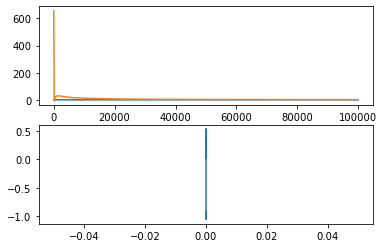

In [127]:
# Attempt using vectfit (ported from the original vectfit)

from rmm import vectfit
np.random.seed(145)
number_of_poles = 40
test_s = np.linspace(1,1e5, 800)

true_poles = rmm_utils.random_poles(number_of_poles, [[1, 10000], [1,1e5]])
true_residues = 1000*np.array([ np.exp(1j*2*np.pi*np.random.rand(1)) for i in range(number_of_poles)])
test_f = sum(c/(test_s- a) for c, a in zip(true_residues, true_poles))

fit_poles, fit_residues, d,h = vectfit.vectfit_auto_rescale(test_f, test_s, n_poles = 40, n_iter=10)

fitted = vectfit.model(test_s, fit_poles, fit_residues, d, h)

fig,(ax1,ax2) = plt.subplots(2,1)
ax1.plot(test_s, test_f.real)
ax1.plot(test_s, fitted.real)

ax2.plot(test_s.imag, test_f.imag)
ax2.plot(test_s.imag, fitted.imag)
plt.show()

In [128]:
X, Y, true_poles, true_residues, complex_data, noised_data = rmm_utils.load_data(path)
Z = rmm_utils.complex_mesh(X,Y)
fit_poles, fit_residues, d, h = vectfit.vectfit_auto(complex_data.flatten(), Z, n_poles = 10, n_iter=8)


ValueError: operands could not be broadcast together with shapes (10000,) (50,) 

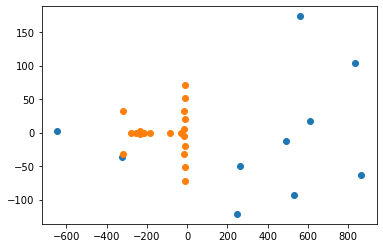

In [93]:
plt.scatter(true_poles.real, true_poles.imag)
plt.scatter(fit_poles.real, fit_poles.imag)

/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


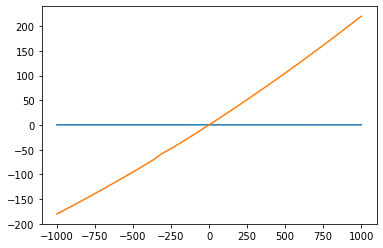

In [119]:
from rmm import devel

importlib.reload(devel)

fitted = devel.rational_function(X, fit_poles, fit_residues,0,(d,h))

plt.plot(X, complex_data[:,0])
plt.plot(X, fitted)

In [87]:
h

-0.00042683118145359083

poles: -41000 + 0j, -4500 + 0j, -3000 + -35000j, -3000 + 35000j, -2000 + -90000j, -2000 + 90000j, -1500 + -45000j, -1500 + 45000j, -1000 + -73000j, -1000 + 73000j, -508.702 + -69975.2j, -508.702 + 69975.2j, -500 + -70000j, -500 + 70000j, -200 + -45000j, -200 + 45000j, -120 + -15000j, -120 + 15000j, -100 + -5000j, -100 + 5000j
residues: -83000 + 0j, -3000 + 0j, 6000 + -45000j, 6000 + 45000j, -5000 + -92000j, -5000 + 92000j, 90.0004 + -10000j, 90.0004 + 10000j, 1000 + -45000j, 1000 + 45000j, 0.422943 + -0.691938j, 0.422943 + 0.691938j, 49999.6 + -79999.3j, 49999.6 + 79999.3j, 39.9986 + -60000j, 39.9986 + 60000j, -20.0002 + -18000j, -20.0002 + 18000j, -5.00005 + -7000j, -5.00005 + 7000j
offset: 0.2
slope: 2e-05
SCALED
poles: -0.41 + 0j, -0.045 + 0j, -0.03 + -0.35j, -0.03 + 0.35j, -0.02 + -0.9j, -0.02 + 0.9j, -0.015 + -0.45j, -0.015 + 0.45j, -0.012102 + -0.681767j, -0.012102 + 0.681767j, -0.01 + -0.73j, -0.01 + 0.73j, -0.005 + -0.7j, -0.005 + 0.7j, -0.002 + -0.45j, -0.002 + 0.45j, -0.0012 

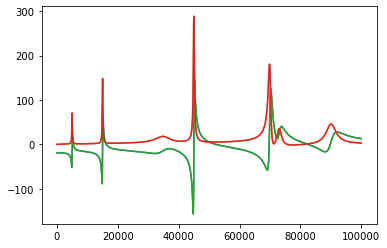

In [105]:
test_s = 1j*np.linspace(1, 1e5, 800)
test_poles = [
    -4500,
    -41000,
    -100+5000j, -100-5000j,
    -120+15000j, -120-15000j,
    -3000+35000j, -3000-35000j,
    -200+45000j, -200-45000j,
    -1500+45000j, -1500-45000j,
    -500+70000j, -500-70000j,
    -1000+73000j, -1000-73000j,
    -2000+90000j, -2000-90000j,
]
test_residues = [
    -3000,
    -83000,
    -5+7000j, -5-7000j,
    -20+18000j, -20-18000j,
    6000+45000j, 6000-45000j,
    40+60000j, 40-60000j,
    90+10000j, 90-10000j,
    50000+80000j, 50000-80000j,
    1000+45000j, 1000-45000j,
    -5000+92000j, -5000-92000j
]
test_d = .2
test_h = 2e-5

test_f = sum(c/(test_s - a) for c, a in zip(test_residues, test_poles))
test_f += test_d + test_h*test_s
vectfit.vectfit_auto(test_f, test_s)

poles, residues, d, h = vectfit.vectfit_auto_rescale(test_f, test_s)
fitted = vectfit.model(test_s, poles, residues, d, [h])
plt.figure()
plt.plot(test_s.imag, test_f.real)
plt.plot(test_s.imag, test_f.imag)
plt.plot(test_s.imag, fitted.real)
plt.plot(test_s.imag, fitted.imag)
plt.show()

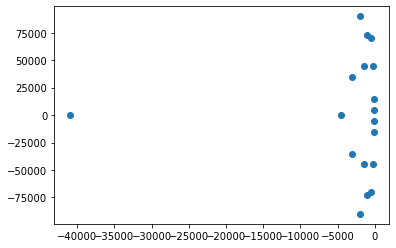

In [115]:
plt.scatter(np.array(test_poles).real, np.array(test_poles).imag)


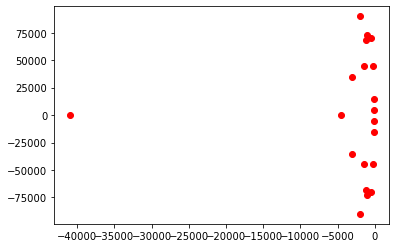

In [118]:
plt.scatter(poles.real, poles.imag, color='r')